# Clone Graph
Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (`int`) and a list (`List[Node]`) of its neighbors.
```Python
class Node {
    public int val;
    public List<Node> neighbors;
}
```
 

**Test case format:**

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with `val == 1`, the second node with `val == 2`, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with `val == 1`. You must return the copy of the given node as a reference to the cloned graph.

<style>
  .big img{
    width:50%;
  }
</style>
# Examples

**Example 1:**
<div class="big">

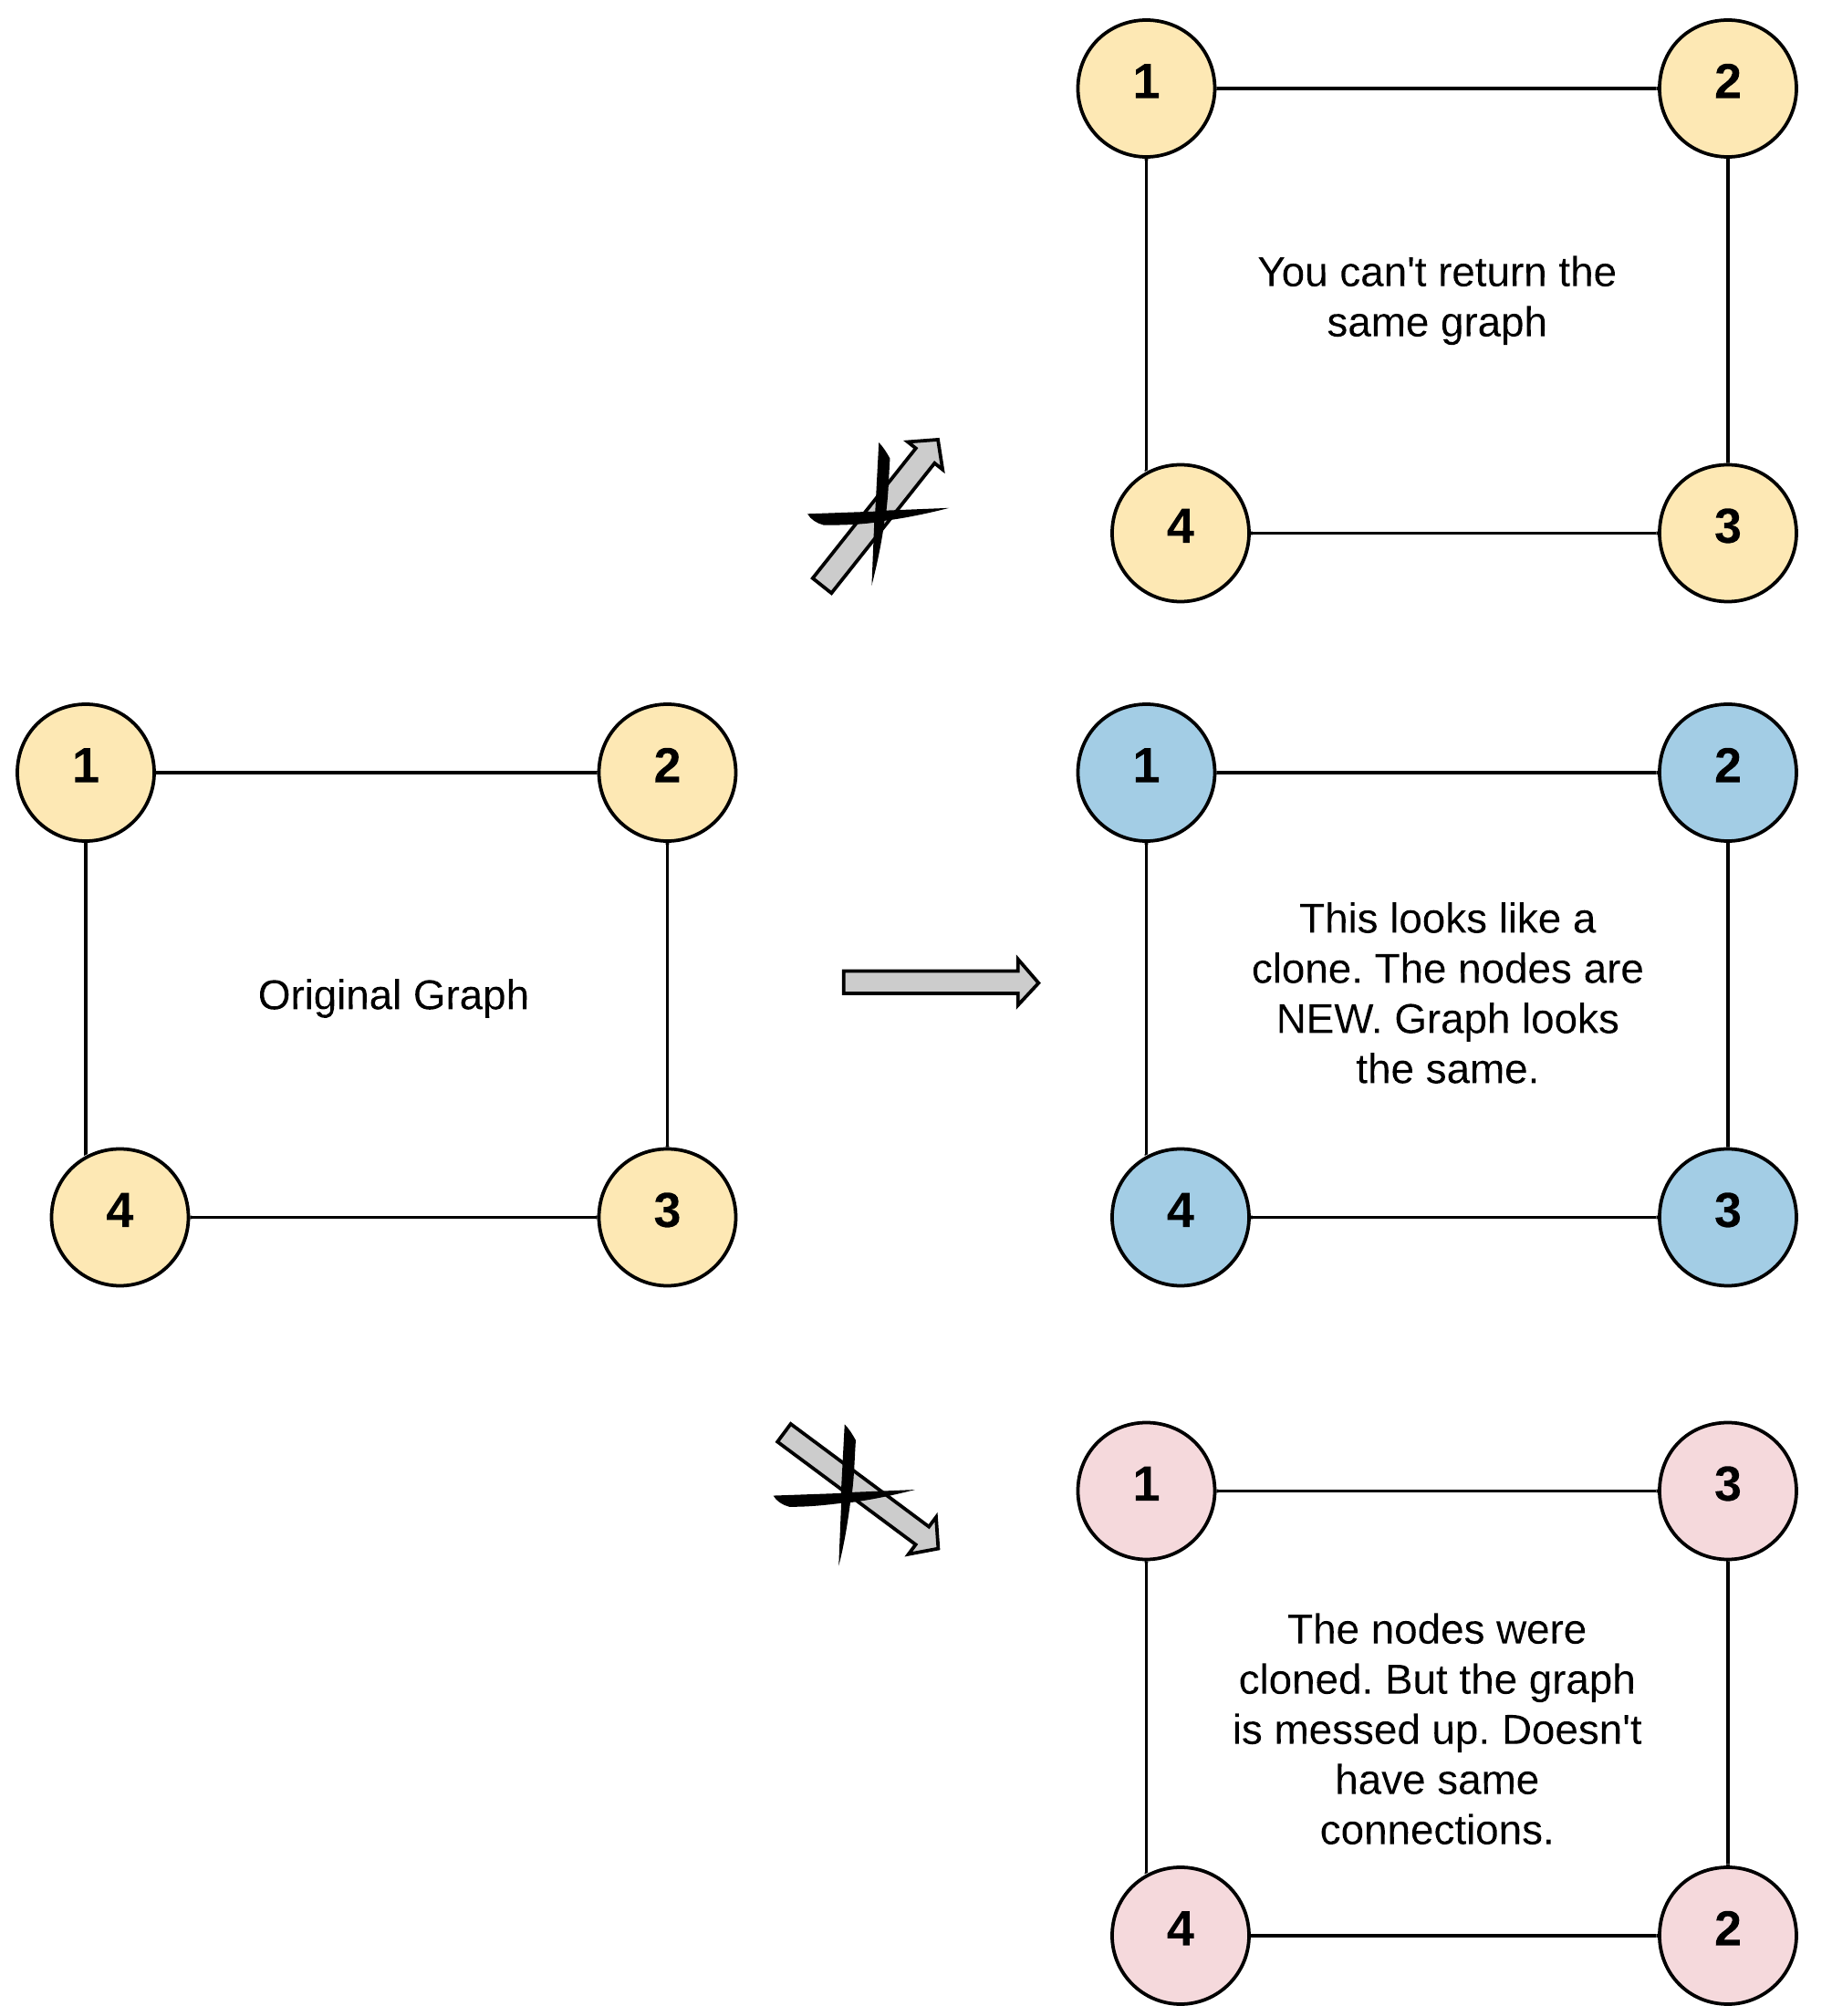

</div>

```Python
Input: adjList = [[2,4],[1,3],[2,4],[1,3]]
Output: [[2,4],[1,3],[2,4],[1,3]]
```
Explanation: There are 4 nodes in the graph.
- 1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
- 2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).
- 3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
- 4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).

**Example 2:**

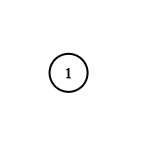
```Python
Input: adjList = [[]]
Output: [[]]
```
Explanation: Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.

**Example 3:**
```Python
Input: adjList = []
Output: []
```
Explanation: This an empty graph, it does not have any nodes.

In [1]:
'''
    Method 1: BFS
'''
from collections import deque
from typing import Optional


# Definition for a Node.
class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: Optional["Node"]) -> Optional["Node"]:
        if node == None:
            return None
        queue = deque([node])
        visited = {}
        root = node
        while len(queue) > 0:
            node = queue.popleft()
            if node not in visited:  # Note that node may be appended into queue multiple times before it is popped from the left
                newNode = Node(node.val)
                visited[node] = newNode
                for neighbor in node.neighbors:
                    if neighbor in visited:
                        visited[neighbor].neighbors.append(newNode)
                        newNode.neighbors.append(visited[neighbor])
                    else:
                        queue.append(neighbor)
        return visited[root]

We can also consider using DFS to solve this problem. Note that the following is an incorrect algorithm.

In [2]:
from typing import Optional


# Definition for a Node.
class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: Optional["Node"]) -> Optional["Node"]:
        if node == None:
            return None
        root = node
        visited = {}

        def dfs(node):
            if node in visited:
                return
            newNode = Node(node.val)
            visited[node] = newNode
            for neighbor in node.neighbors:
                if neighbor in visited: # The incorrect part
                    visited[neighbor].neighbors.append(newNode)
                    newNode.neighbors.append(visited[neighbor])
                else:
                    dfs(neighbor)

        dfs(root)

        return visited[root]

If the above algorithm is run on Example 1, the result will be: `[[2,4,4],[1,3],[2,4],[1,1,3]]`. Let us explain why this is the case.

We use `old(val)` to represent an old node with the value `val` and `new(val)` to represent a new node with the value `val`. When `node = old(1)`, the loop

<div style="text-align: center;">

```Python
for neighbor in node.neighbors
```

</div>

first processes `neighbor = old(2)`. Since `old(2)` is not in visited at this point, `dfs(2)` is executed. Note that by the time this function returns, `old(4)` is already in visited (unlike the state before `dfs(2)` was executed) and `new(4)` has already been established as a neighbor of `new(1)`. According to 
<div style="text-align: center;">

```Python
if neighbor in visited,
```

</div>
`new(4)` will be established as a neighbor of `new(1)` again, which causes the encountered issue (note that this issue does not occur when using BFS). To solve this issue, we should preserve the state of `visited` before entering the loop.

In [3]:
from typing import Optional


# Definition for a Node.
class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: Optional["Node"]) -> Optional["Node"]:
        if node == None:
            return None
        root = node
        visited = {}
        def dfs(node):
            if node in visited:
                return
            newNode = Node(node.val)
            visited[node] = newNode
            visited_history = {
                neighbor: neighbor in visited
                for neighbor in node.neighbors
            }
            for neighbor in node.neighbors:
                if visited_history[neighbor]:
                    visited[neighbor].neighbors.append(newNode)
                    newNode.neighbors.append(visited[neighbor])
                else:
                    dfs(neighbor)
        
        dfs(root)

        return visited[root]